<h1 style="text-align:center">Diagnóstico Basado en Datos</h1>

***
***

Empezamos como siempre con los imports necesarios

In [528]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.decomposition import PCA
import pandas as pd

# Seteo algunas cositas para los gráficos
plt.rcParams['font.size'] = '13'
plt.rcParams['figure.figsize'] = (12, 8)
plt.rc('xtick', color='black', labelsize='medium', direction='inout')
plt.rc('ytick', color='black', labelsize='medium', direction='inout')
plt.rc('xtick.major', size=7, pad=2)
plt.rc('xtick.minor', size=4, pad=5)
plt.rc('ytick.major', size=7, pad=2)
plt.rc('ytick.minor', size=4, pad=5)

In [171]:
# plt.rcParams.keys()

## Pequeño análisis preliminar: carga de datos, visualización y filtrado

***

Cargamos nuestro excel con los datos que vamos a trabajar

In [340]:
df_H = pd.read_excel(open('train_alumnos.xls', 'rb'))

In [174]:
df_H.head(5)

,477.808211,59.978396,8.935812,192080.659200,411101.621700,1044.594759,159.235115,31714.525070,166.244945,64.798767,...,3.139996,19.417101,351.680000,119320.000000,1.099031,1.099000,159.227956,31714.000000,15.072000,109087.417700
0,477.866521,59.999246,8.936409,192316.2579,411952.3872,1050.280231,159.479501,31713.83038,166.502237,64.501597,...,3.140001,19.206501,351.68,119320.0,1.099031,1.099,159.487728,31714.0,15.072,105983.3898
1,478.073729,60.010612,8.937665,192306.3991,411624.2572,1041.566291,159.235335,31713.83729,166.320305,64.333576,...,3.139997,17.674997,351.68,119320.0,1.099031,1.099,159.236591,31714.0,15.072,105811.5745
2,477.982041,60.020598,8.935153,192028.4184,411536.7079,1039.305805,159.259136,31714.91556,166.426186,64.115754,...,3.140001,19.849008,351.68,119320.0,1.099031,1.099,159.246042,31714.0,15.072,106122.1735
3,477.635950,60.048544,8.933897,192136.0791,411947.7426,1036.790697,159.052995,31713.85478,166.230595,63.938407,...,3.140000,21.452857,351.68,119320.0,1.099031,1.099,159.047563,31714.0,15.072,107248.9096
4,477.973500,60.066818,8.938198,192563.7471,411777.2886,1033.231632,158.889181,31713.54706,166.090237,63.772301,...,3.140002,16.557408,351.68,119320.0,1.099031,1.099,158.903845,31714.0,15.072,106368.5604


In [341]:
df_H.shape

(20968, 60)

Vemos que tenemos 20968 filas por 60 columnas de datos. Las columnas representan las variables y las filas, registros en distintos días.

A continuación, vamos a pasar esta dataBase de Pandas a una matriz de NumPy. Vamos también a separar el número de filas y de columnas y a crear una lista F con largo total de las filas.

In [342]:
H = df_H.to_numpy()
fil, col = np.shape(H)
F = np.linspace(1, fil, fil)

Vamos a graficar un histograma para ver con qué nos enfrentamos.

Text(0.5, 1.0, 'Distribución de valores de distancia de Mahalanobis')

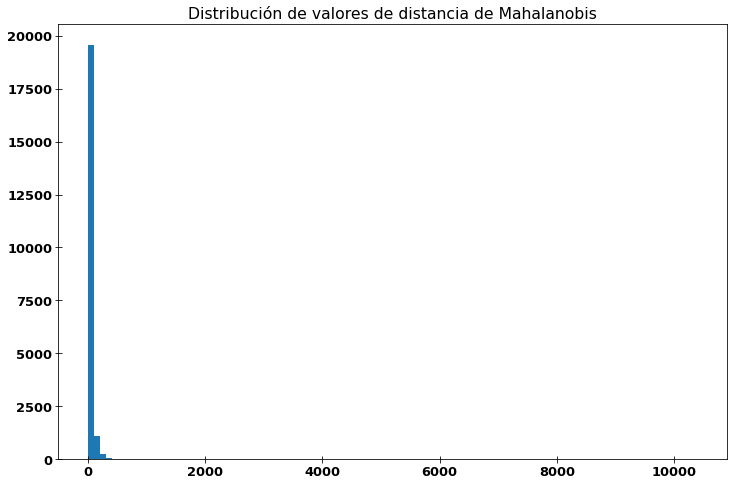

In [348]:
Hn = stats.zscore(H)
S = np.linalg.pinv(np.cov(Hn.T))
Hott = np.sum(Hn @ S * Hn,axis=1)

fig, ax = plt.subplots()
ax.hist(Hott, bins=100)
ax.set_title('Distribución de valores de distancia de Mahalanobis')

Podemos ver que tenemos una fuerte concentración de datos a bajos valores, pero luego pequeña cantidad de puntos anómalos que hacen que el gráfico se vea de esta forma.

Vamos a reducir nuestra información aplicando un filtro que tiene en consideración la distancia de Mahalanobis, aplicando el **Test de Hotelling**.

Distancia de Mahalanobis:

$T^2 = H_{norm} \times S^{-1} * H_{norm}$

donde S es la matriz de covarianza del sistema, $\times$ implica multiplicación matricial y * representa una multiplicación *elemento a elemento*.

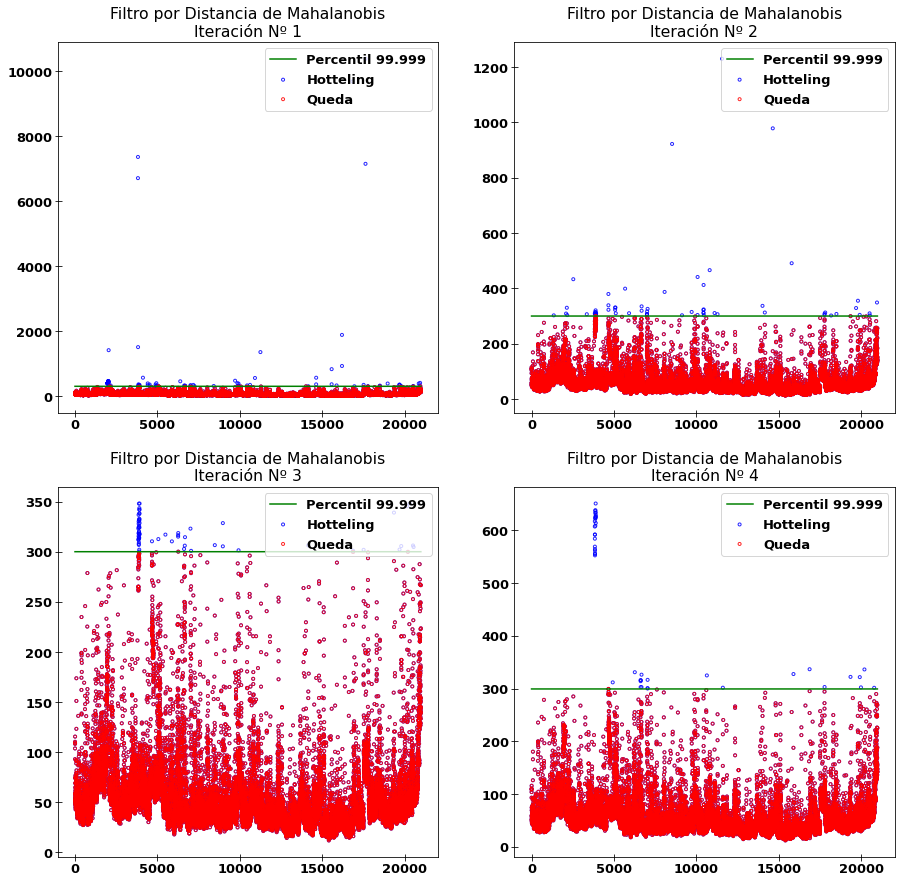

In [349]:
fig = plt.figure(figsize=(15, 15))

for a in range(4):
    # Normalizo la matriz H
    Hnorm = stats.zscore(H)
    # Calculo la inversa de la matriz de covarianza de la traspuesta de Hnorm
    S = np.linalg.pinv( np.cov( Hnorm.T ) )
    # Acá hago el producto matricial de Hnorm por S, multiplicado (elemento a elemento) 
    Hott = np.sum( Hnorm @ S * Hnorm, axis = 1 ) 
    ax = fig.add_subplot(2, 2, a+1)
    ax.scatter(F, Hott, 
               facecolors = 'none',
               edgecolors = 'blue',
               alpha = 0.85,
               s = 9,
               label = 'Hotteling')
    ax.set_title(f'Filtro por Distancia de Mahalanobis\nIteración Nº {a+1}')
    
    # Nos vamos a quedar con todos aquellos puntos cuyo estadístico de Hotteling sea menos que 300
    # Acá, la variable Queda es un array de booleanos con True donde se cumple la condición
    Queda = Hott < 300
    H = H[Queda, :]
    F = F[Queda]
    Hott = Hott[Queda]
    ax.scatter(F, Hott,
               facecolors = 'none',
               edgecolors = 'red',
               alpha = 0.85,
               s = 9,
               label = 'Queda')
    LimHott = np.percentile(Hott, 99.999, axis=0)
    ax.plot(LimHott * np.ones(fil),
            color = 'green',
            label='Percentil 99.999')
    ax.legend(loc = 'upper right')

Como vemos, en cada iteración nos estamos quedando con aquellos puntos que responden a la física del problema, es decir, aquellos que tienen una menor distancia de Mahalanobis. Establecimos un corte en 300 unidades y se puede observar como el filtro funciona de maravillas.

Además podemos ver que el valor elegido de 300 para el corte corresponde al percentil 99.999 del pool de datos analizados.

In [350]:
diferencia = df_H.shape[0] - F.shape[0]

In [351]:
print(f'Filtrar como filtramos nos libró de {diferencia} mediciones anómalas.')

Filtrar como filtramos nos libró de 302 mediciones anómalas.


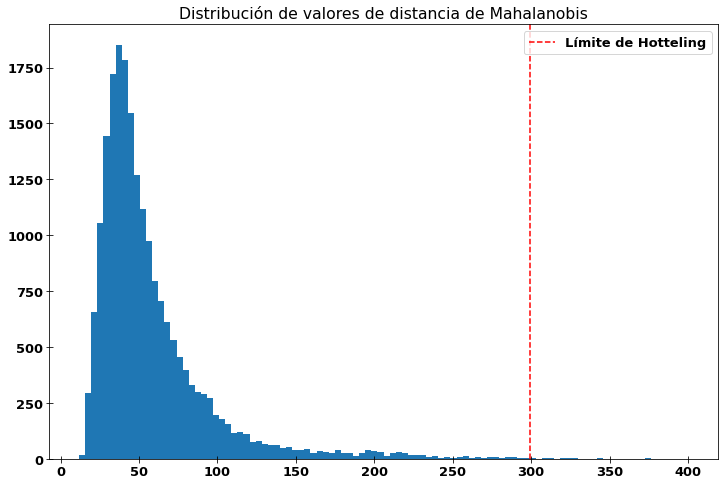

In [360]:
Hn = stats.zscore(H)
S = np.linalg.pinv(np.cov(Hn.T))
Hott = np.sum(Hn @ S * Hn,axis=1) 
plt.figure()
plt.hist(Hott,bins=100)
plt.axvline(x=LimHott,
            linestyle = '--',
            c = 'red',
            label = 'Límite de Hotteling')
plt.title('Distribución de valores de distancia de Mahalanobis')
plt.legend(loc = 'upper right')

Ahora está mucho mejor!

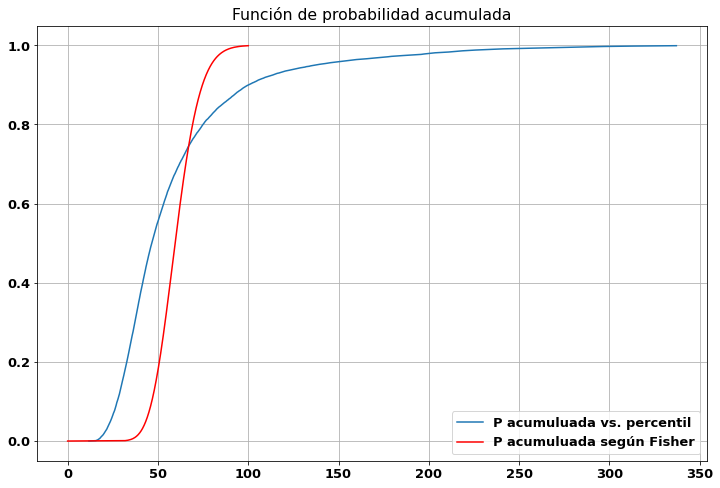

In [194]:
alfa = np.linspace(0, 0.999, 1000)
percen_Hott = np.percentile(Hott, alfa*100, axis=0)

fig, ax = plt.subplots()
ax.set_title('Función de probabilidad acumulada')

ax.plot(percen_Hott, alfa,
        label = 'P acumuluada vs. percentil')

Lim_F = stats.f.ppf(alfa, dfn=col, dfd=fil-col) * col * (fil-1) / (fil - col)

ax.plot(Lim_F, alfa, 
        color='red',
        label = 'P acumuluada según Fisher')

ax.grid(True)
ax.legend(loc = 'lower right')

El gráfico de más arriba muestra una comparación entre el límite que uno hubiera usado para tener el "99.999"% de los casos según Fisher y según el percentil del pool de datos. Podemos ver claramente que con Fisher nos hubiéramos quedado algo cortos, hubiéramos seteado el límite de filtro en alto así como 100, mientras que con el otro método tenemos el valor de 300.

La idea es que cuando uno no tiene ni idea de qué está buscando, usando Fisher al menos tiene un punto de partida como para arrancar, eso siempre es mejor que no tener nada!

## Análisis de Componentes Principales, **PCA**

***

Tenemos 60 variables, lo ideal sería trabajar sólo con aquellas que realmente influencien en la varianza, es decir, queremos reducir el número de variables y quedarnos con aquellas con mayor impacto en la explicación de la varianza

Vamos a cargar un modelo de PCA para trabajar con estos datos

In [199]:
Hz = stats.zscore(H)
pca = PCA()
pca.fit(Hz)
av = pca.explained_variance_ratio_

En la variable `av` podemos ver una lista de 60 posiciones (uno para cada variable) con su porcentaje de explicación de la varianza. Esto, claramente debería sumar 1.

In [198]:
sum(av)

0.9999999999999996

Vamos a elegir el número de componentes tal que tengamos explicado el 95% de la varianza.

In [207]:
expli = np.zeros(np.size(av))
expli[0] = av[0]
for a in range(1, np.size(av)):
    # Voy acumulando las probabilidades
    expli[a] = expli[a-1] + av[a]
    # Cuento cuantas variables me hacen falta para explicar el 95.5% de la varianza
    if expli[a] < .95:
        npc = a + 1

In [208]:
print(f'Necesito {npc} componentes para explicar el 95.5% de la varianza.')

Necesito 17 componentes para explicar el 95.5% de la varianza.


Podemos ver esto mismo con un gráfico de varianza explicada vs número de componentes

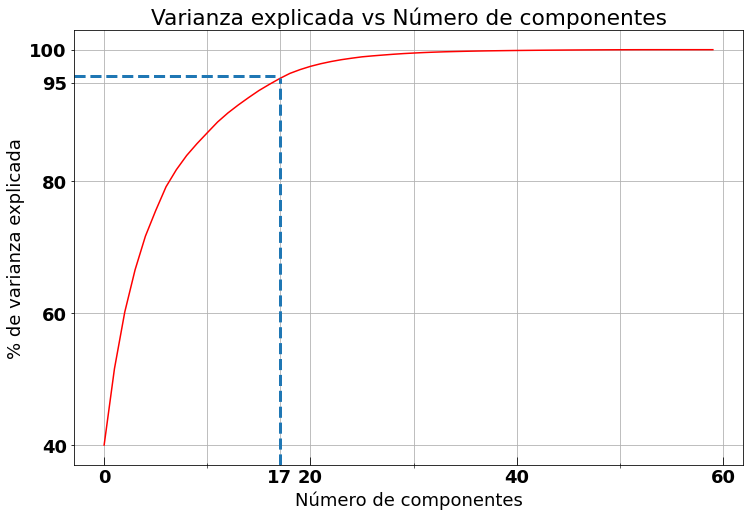

In [338]:
# plt.rcParams['font.size'] = 18
plt.rc('font', size=18)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Varianza explicada vs Número de componentes')
ax.set_xlabel('Número de componentes')
ax.set_ylabel('% de varianza explicada')

ax.plot(expli,
        color = 'red')
ax.axvline(x=17, linewidth=3, linestyle='--', ymax = 0.89)
ax.axhline(y=0.96, linewidth=3, linestyle='--', xmax = 0.3)

xticks = [0, 17, 20, 40, 60]
xticks_m = [10, 30, 50]
yticks = [0.4, 0.6, 0.8, 0.95, 1]
yticks_m = [95.5]
yticks_lab = [40, 60, 80, 95, 100]

ax.set_xticks(xticks)
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_tick_params(direction = 'in', which = 'major', size = 8)
ax.xaxis.set_tick_params(direction = 'inout', which = 'minor', size = 5)

ax.set_xticks(xticks_m, minor=True)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks_lab)

ax.grid(True, which = 'both')

Vamos entonces a construir el modelo de PCA.

- Avm = Matriz de autovectores del modelo, usando los primeros 17 componentes.
- Avr = Matriz de autovectores de los residuos, el resto de los componentes.

In [385]:
Avm = np.asmatrix(pca.components_[0:npc, :])
Avr = np.asmatrix(pca.components_[npc+1:, :])   

# Cálculo los límites de los test
ConfT2a = 99.9 # % grado de confianza del test
ConfSPE = 99.9 # % grado de confianza del test 

# Cálculo el T² (Mahalanobis) según la fórmula de probabilidad de Fischer
T2aMAX = stats.f.ppf(ConfT2a/100, dfn=npc, dfd=fil-npc) * npc * (fil-1) / (fil-npc)
print(f'{T2aMAX:.3f}')

40.846


Y ahora lo calculamos con nuestros datos

274.746


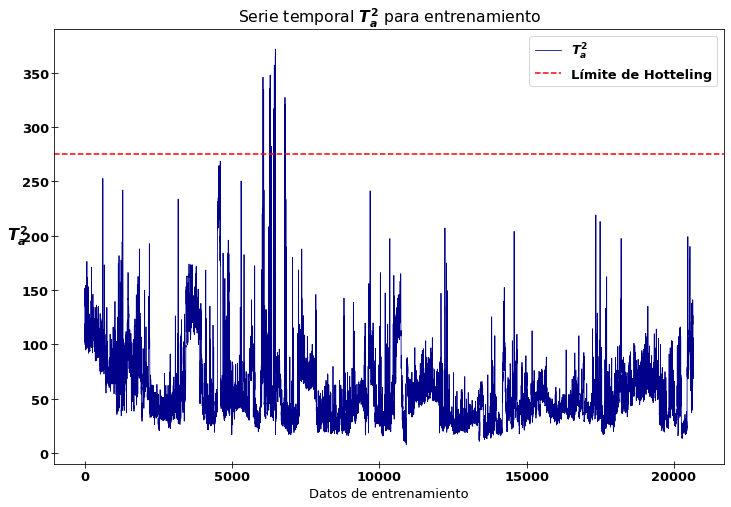

In [416]:
Scorem = np.array(Hz @ Avm.T)
T2a = np.sum( Scorem * Scorem , axis=1)
T2aMAX = np.percentile(T2a, ConfT2a, axis=0)
print(f'{T2aMAX:.3f}')
# plt.figure()
# plt.plot(T2a)
# plt.title('Serie temporal T2a para train')
# plt.plot(T2aMAX*np.ones(np.shape(T2a)[0]))


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2a, label = '$T^2_a$',
        linewidth = 0.8,
        c = 'darkblue')
ax.set_title('Serie temporal $T^2_a$ para entrenamiento')
ax.set_ylabel('$T^2_a$',
              fontsize = 16,
              rotation = 0)
ax.set_xlabel('Datos de entrenamiento')
ax.axhline(y = T2aMAX,
           linestyle = '--',
           c = 'red',
           label = 'Límite de Hotteling')
ax.legend(loc = 'upper right')

Podemos ver que solo en una instancia se superó el threshold, el resto del tiempo el sistema se mantuvo en un control estadístico.

Vamos a calcular SSPE (Suma del cuadrado del error de las predicciones)

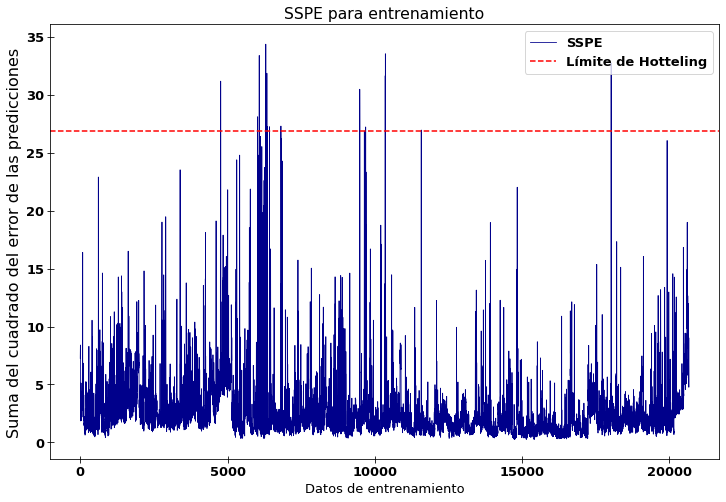

In [421]:
# Calculo SSPE
Score = np.array(Hz @ Avr.T)
SScore = np.sum( Score * Score , axis=1)
mSPE = np.mean(SScore )
vSPE = np.var( SScore )

g1 = vSPE/(2**mSPE)
h1 = (2.*(mSPE**2))/vSPE

# Este es el teórico que responde a una distribución Chi cuadrado
# LimSPE = g1 * stats.chi2.ppf(ConfSPE/100, h1)
# Pero vamos a usar esta con nuestros datos
LimSPE = np.percentile(SScore, ConfSPE, axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(SScore, label = 'SSPE',
        linewidth = 0.8,
        c = 'darkblue')
ax.set_title('SSPE para entrenamiento')
ax.set_ylabel('Suma del cuadrado del error de las predicciones',
              fontsize = 16)
ax.set_xlabel('Datos de entrenamiento')
ax.axhline(y = LimSPE,
           linestyle = '--',
           c = 'red',
           label = 'Límite de Hotteling')
ax.legend(loc = 'upper right')

Ya tenemos entrenado el modelo! Ahora vamos a pasar a usar los datos de testeo para evaluar el modelo creado.

## Evaluando el modelo con Datos de Testeo
***

In [423]:
# ANALIZO DATOS TEST
df_H2 = pd.read_excel(open('test_alumnos.xls', 'rb'))
# Saco media y desvest con histórico de train
mH = np.mean(H,axis=0)
dH = np.std(H,axis=0)

H2 = df_H2.to_numpy()
filas2, col2 = np.shape(H2)
F = np.linspace(1, filas2, filas2)
# Normalizo usando los datos históricos (ya filtrados, claramente)
Hn2 = (H2-mH) / dH

# Vuelvo a calcular T² sub a
Scorem = np.array(Hn2 @ Avm.T)
T2a = np.sum(Scorem**2, axis=1)

In [390]:
H2.shape

(200, 60)

Podemos ver que ahora tenemos menos cantidad de datos que antes (1% de la cantidad de los datos de entrenamiento).

Vamos a graficar esto para ver cómo se ve.

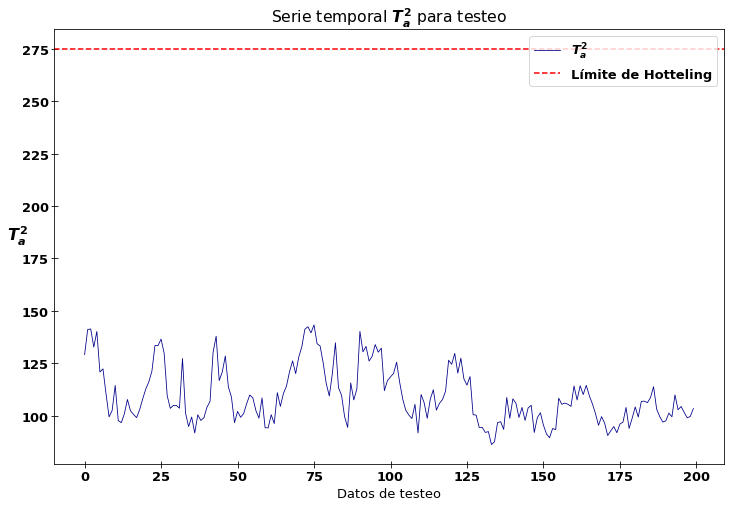

In [424]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2a, label = '$T^2_a$',
        linewidth = 0.8,
        c = 'darkblue')
ax.set_title('Serie temporal $T^2_a$ para testeo')
ax.set_ylabel('$T^2_a$',
              fontsize = 16,
              rotation = 0)
ax.set_xlabel('Datos de testeo')
ax.axhline(y = T2aMAX,
           linestyle = '--',
           c = 'red',
           label = 'Límite de Hotteling')
ax.legend(loc = 'upper right')

In [425]:
# saco el spe
Score2 = np.array(Hn2 @ Avr.T)
SScore2 = np.sum( Score2**2 , axis=1)

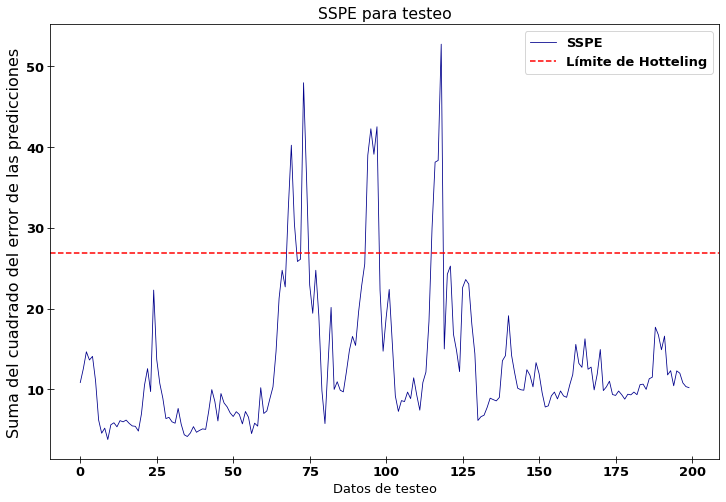

In [426]:
# Los ploteo junto con el error
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(SScore2, label = 'SSPE',
        linewidth = 0.8,
        c = 'darkblue')
ax.set_title('SSPE para testeo')
ax.set_ylabel('Suma del cuadrado del error de las predicciones',
              fontsize = 16)
ax.set_xlabel('Datos de testeo')
ax.axhline(y = LimSPE,
           linestyle = '--',
           c = 'red',
           label = 'Límite de Hotteling')
ax.legend(loc = 'upper right')

Se puede ver que el límite fue superado en tres ocasiones. Ahora ya no se debe a un error estadístico, puesto que filtramos los datos, entrenamos un modelo que dio buenos resultados y ahora lo estamos probando con datos frescos.

Vamos a tratar de descomponer la matriz H utilizada para ver de encontrar en dónde está la falla (de entre nuestras 60 variables posibles...).

In [419]:
# Saco el porte de cada variable al spe
TMEDZ = np.array(Hn2@Avm.T)

MEDZMOD = np.array(TMEDZ @ Avm)

MEDZERR = Hn2 - MEDZMOD

SPEDESC = MEDZERR**2

[Text(23, 0, '23'), Text(35, 0, '35')]

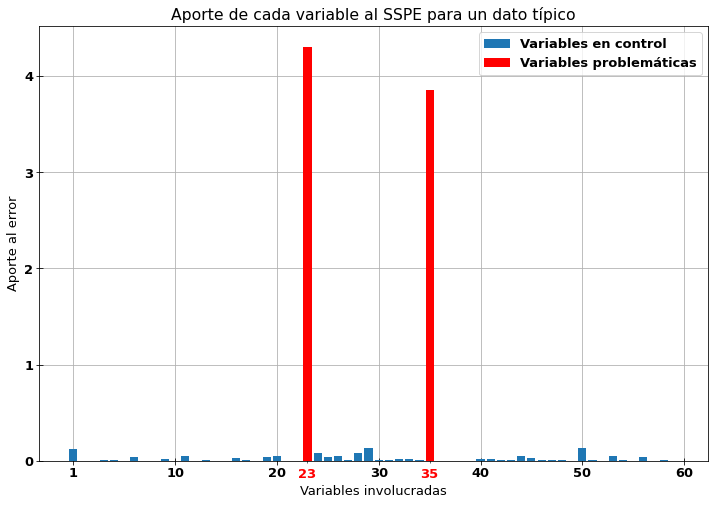

In [493]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Aporte de cada variable al SSPE para un dato típico')

ax.bar(range(col2), SPEDESC[158,:], 
       zorder=3,
       label = 'Variables en control')
ax.set_ylabel('Aporte al error')
ax.set_xlabel('Variables involucradas')
ax.grid(True) 

# Vamos a averiguar cúales son los problemáticos
valores = SPEDESC[158, :]
mayores = [valores>1]
pos_prob, val_prob = [], []
for var, elem in enumerate(mayores[0], start=0):
    if elem == True:
        pos_prob.append(var)
        val_prob.append(valores[var])

# Y lo graficamos
ax.bar(pos_prob, val_prob, 
       color='red', 
       zorder=4,
       label = 'Variables problemáticas')

ax.legend(loc='upper right')
xticks = [0, 10, 20, 30, 40, 50, 60]
xticks_lab = [1, 10, 20, 30, 40, 50, 60]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_lab)
ax.set_xticks(pos_prob, minor=True)
ax.set_xticklabels(pos_prob, minor=True, c = 'red')

Acá se ve **claramente** que las variables fuera de control son la 23 y la 35! Estas variables son las que aportan más a la ruptura de correlación entre datos, que es lo que aporta el SSPE

Esto es muy poderoso, pudimos detectar un error y, no solo eso, sino pudimos atribuírselo a variables en particular (que resultaron ser Temperatura y Presión de un plato específico de una columna de destilación específica). Es decir, se pasó de la detección al **diagnóstico** usando datos!

Podemos ver lo mismo pero en función del tiempo.

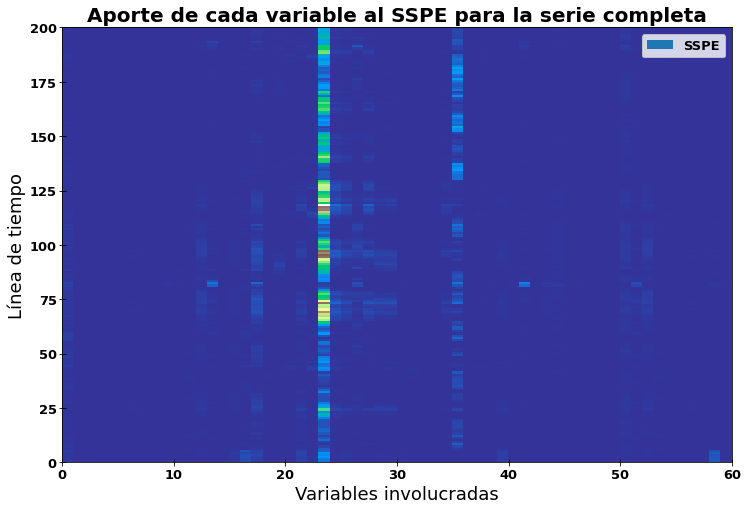

In [516]:
# Grafico el aporte frente a una falla
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolor(SPEDESC,
          cmap = 'terrain',
          label = 'SSPE')

ax.set_title('Aporte de cada variable al SSPE para la serie completa',
             fontsize = 20,
             fontweight = 'bold')
ax.set_xlabel('Variables involucradas',
              fontsize = 18)
ax.set_ylabel('Línea de tiempo',
              fontsize = 18)
ax.legend(loc = 'upper right')

Acá podemos ver las variables en X y los tiempos en Y. Vemos que ambas variables se comportan de forma anómala casi todo el tiempo, no solo en un par de horas.

Esto es importante porque puede darse el caso en el que se está frente a una transición entre dos instancias deseables, y todo el tiempo intermedio "resulta anómalo", pero esto no es grave si se da en un transcurso de tiempo corto.

En este caso se ve otra situación, el problema es sostenido en el tiempo!

Finalmente, podemos ver un plotteo en X, Y de la situación de datos, tanto de entrenamiento como de testeo

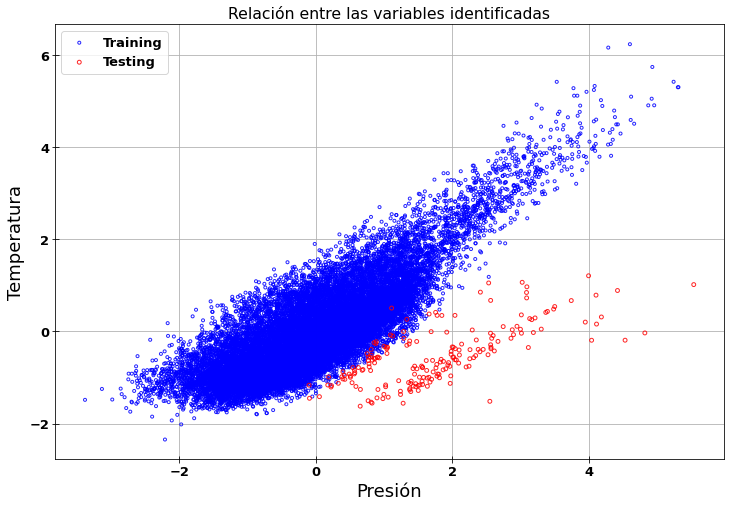

In [532]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('Relación entre las variables identificadas')
# ax.scatter(Hn[:,23],Hn[:,35], label="train")
# ax.scatter(Hn2[:,23],Hn2[:,35], label="test",color='red')

ax.scatter(Hn[:,23], Hn[:,35],
           facecolors = 'none',
           edgecolors = 'blue',
           alpha = 0.85,
           s = 9,
           zorder = 3,
           label = 'Training')
ax.scatter(Hn2[:,23], Hn2[:,35],
           facecolors = 'none',
           edgecolors = 'red',
           alpha = 0.85,
           s = 15,
           zorder = 3,
           cmap = 'viridis',
           label = 'Testing')

ax.set_xlabel('Presión',
              fontsize = 18)
ax.set_ylabel('Temperatura',
              fontsize = 18)
ax.legend(loc = 'upper left')
ax.grid(True)

Vemos como los casos de testeo se alejaron del modelo!

Resulta que había entrado nitrógeno gaseoso en la columna de destilación y eso generaba valores anomálos de presión que no condecían con la temperatura que debería tener según la física del modelo.

Como la presión medida no era la verdadera, se **rompió** la relación entre P y T.

Hoja de ruta:

- Para calcular el estadístico empleado:
    1. Normalizar
    2. Calcular matriz de covarianza
    3. Invertirla
    4. Multiplicar los datos normalizados por dicha matriz a izquierda y derecha
    5. Sumar estos datos
- Para pasar del espacio original al PCA:
    1. O usamos `pca.components_`
    2. O se calculan Aval y Avec de la matriz de covarianza "a mano"
- Para T2a o SSPE:
    1. Multiplicar los datos por los Avec seleccionados
    2. Multiplicar por los Scores